In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files
from datetime import datetime
from dateutil.relativedelta import relativedelta


In [ ]:
n = 30                       # in years, runtime of loan
S0= 100e3                    # in EUR, loan amount

i_var = 1.2                  # in percent, intrest rate premium on EURIBOR

i_band_low = 1.9             # in percent, minimum intrest rate of bandwith loan premium on EURIBOR
i_band_high = 3.3            # in percent, maximum intrest rate of bandwith loan premium on EURIBOR  
n_band = 10                  # in years, runtime of bandwith loan afterwards i_n_band offset to EURIBOR
i_n_band = 3                 # in percent, intrest rate of fix loan premium on EURIBOR after n_band

n_fix = 10                   # in years, runtime of fix loan afterwards i_n_fix offset to EURIBOR
i_fix = 3                    # in percent, intrest rate of fix loan period
i_n_fix = 1.65               # in percent, intrest rate of fix loan premium on EURIBOR after n_fix

R_zu = 00e3                  # in EUR, Special repayment per year

In [ ]:
################################################################################
## Load estimated 3M Euribor data (can/should be changed)                      #
################################################################################

#uploaded = files.upload()
df = pd.read_csv("3M_Euribor_estimation.txt",sep=';',header=None)
# df.head()

,0,1
0,01.08.2022,0.00246
1,01.09.2022,0.00712
2,01.12.2022,0.01000
3,01.02.2023,0.01500
4,01.05.2023,0.02500


[0, 1, 4, 6, 9, 21, 33, 45, 57, 93, 117, 153, 360]


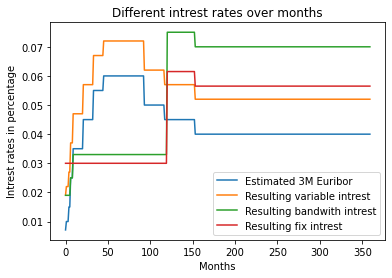

[0.00712, 0.01, 0.01, 0.01, 0.015, 0.015, 0.025, 0.025, 0.025, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045, 0

In [ ]:
################################################################################
##  Intrest rate calculations                                                  #
################################################################################

date_csv = []
for cnt,i in enumerate(df[0]):
  date_csv.append(datetime.strptime(i, '%d.%m.%Y'))

x = []
for i in date_csv:
  rdiff = relativedelta(i,date_csv[0])
  x.append(rdiff.years*12+rdiff.months)

print(x)

mon = np.linspace(0,n*12-1,n*12)
inte = []
cnt_i = 0;
for cnt,i in enumerate(mon):
  if mon[cnt] == x[cnt_i]:
    # print(i)
    inte.append(df[1][cnt_i+1])
    cnt_i = cnt_i+1
  else:
    inte.append(df[1][cnt_i])

i_var_eff = []
i_band_eff= []
i_fix_eff = []

for cnt,i in enumerate(inte):
  i_var_eff.append(i+i_var/100)

  if cnt < 12*n_band:
    if i < i_band_low/100:
      i_band_eff.append(i_band_low/100)
    elif i > i_band_high/100:
      i_band_eff.append(i_band_high/100)
    else:
      i_band_eff.append(i)
  else:
      i_band_eff.append(i+i_n_band/100)

  if cnt < 12*n_fix:
    i_fix_eff.append(i_fix/100)
  else:
    i_fix_eff.append(i+i_n_fix/100)

plt.plot(mon,inte,label='Estimated 3M Euribor')
plt.plot(mon,i_var_eff, label='Resulting variable intrest')
plt.plot(mon,i_band_eff, label='Resulting bandwith intrest')
plt.plot(mon,i_fix_eff, label='Resulting fix intrest')
plt.legend()
plt.xlabel('Months')
plt.title('Different intrest rates over months')
plt.ylabel('Intrest rates in percentage')
plt.show()
print(inte)

In [ ]:
################################################################################
##  Calculations to for monthly loan rate                                      #
################################################################################

# function [ R ] = calc_rate( i, S0, n, R, R_zu, mode )
# [ R ] =  calc_rate( i, S0, n, R, R_zu, mode )
# function to calculate dept rate
#   i               Zinssatz
#   S0              Kreditsumme
#   n               Laufzeit in Jahre
#   R               Aktuelle Rate
#   R_zu            Zustäzliche Rate

# Berechnung der Mindestannuität
# https://de.wikipedia.org/wiki/Annuit%C3%A4tendarlehen
# q = 1+i;                    	% Zinsfaktor pro Jahr
# R = S0*q^n*i/(q^n-1)/12;      % min. monatliche Rate

def calc_rate(i,S0,n,R,Rzu):
  q = 1 + i
  if S0 > 0:
    if (S0-R>0):
      if(S0-R-Rzu>0):
        R = S0 * q**n*i/(q**n-1)/12+Rzu
      else:
        R = S0 * q**n*i/(q**n-1)/12+S0
    else:
      R = S0
  else:
    R = 0

  return R


In [ ]:
# To check function/definiton test with knwon example/rate
Ra = 0
R = calc_rate(0.012,100e3,30,Ra,0)
print(R)

332.41692804992346


In [ ]:
################################################################################
##  Calculations to dept and monthly loan                                      #
################################################################################
# calc debt function
# def calc_dept(S0,n,intr,R_zu):
# S0    loan amount
# n     loan term
# intr  loan rate in percent
# R_zu  Special repayment per year

def calc_dept(S0,n,intr,R_zu):
  ST = []                # Restschuld
  ST.append(S0)
  R = []
  R.append(calc_rate(intr[0],ST[0],n,0,0))

  for cnt,i in enumerate(intr):
    # print(cnt)
    if cnt< len(intr)-1:
      if(cnt%12)==0:
        R.append(calc_rate(intr[cnt],ST[cnt],n-cnt/12,R[cnt],R_zu))
      else:
        R.append(calc_rate(intr[cnt],ST[cnt],n-cnt/12,R[cnt],0))
    ST.append(ST[cnt]*(1+i*1/12)-R[cnt])
  return (R,ST)

In [ ]:
[R_var,ST_var] = calc_dept(S0,n,i_var_eff,R_zu)
[R_fix,ST_fix] = calc_dept(S0,n,i_fix_eff, R_zu)
[R_band,ST_band] = calc_dept(S0,n,i_band_eff, R_zu)

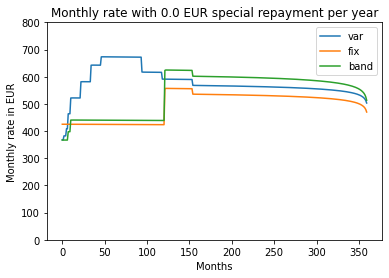

In [ ]:
plt.plot(mon,R_var,label='var')
plt.plot(mon,R_fix,label='fix')
plt.plot(mon,R_band,label='band')
plt.ylim(000,800)
plt.legend()
plt.xlabel('Months')
plt.ylabel('Monthly rate in EUR')
plt.title(f'Monthly rate with {R_zu} EUR special repayment per year')
plt.show()

In [ ]:
print(f'Total repayment with the variable credit:\t{np.sum(R_var):.0f} EUR')
print(f'Total repayment with the fix credit:\t\t{np.sum(R_fix):.0f} EUR')
print(f'Total repayment with the bandwith credit:\t{np.sum(R_band):.0f} EUR')

Total repayment with the variable credit:	208257 EUR
Total repayment with the fix credit:		177922 EUR
Total repayment with the bandwith credit:	194324 EUR
